# **1. Upload the Dataset**

In [35]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (3).csv


# **2. Import Required Libraries**

In [36]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.style.use("seaborn-v0_8-poster")


# **3. Load the Dataset**

In [37]:

df = pd.read_csv('train.csv')

# **4. Basic Data Exploration**

In [38]:

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:

print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")


Dataset contains 891 rows and 12 columns


In [40]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [41]:

df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# **5. Data Cleaning (Handling Missing Values)**

In [42]:
# 1. Filling missing Age values with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# 2. Filling missing Embarked values with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# 3. Droping Cabin column (Because too many missing values)
df.drop('Cabin', axis=1, inplace=True)

# 4. Rechecking if any missing values left
df.isnull().sum()


<ipython-input-42-63901d726beb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-42-63901d726beb>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# **6. Value Counts for Categorical Features**

In [43]:
categorical_cols = ['Sex', 'Embarked', 'Pclass', 'Survived']
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())


Value counts for Sex:
Sex
male      577
female    314
Name: count, dtype: int64

Value counts for Embarked:
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

Value counts for Pclass:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Value counts for Survived:
Survived
0    549
1    342
Name: count, dtype: int64


# **7. Univariate Analysis (One Variable at a Time)**

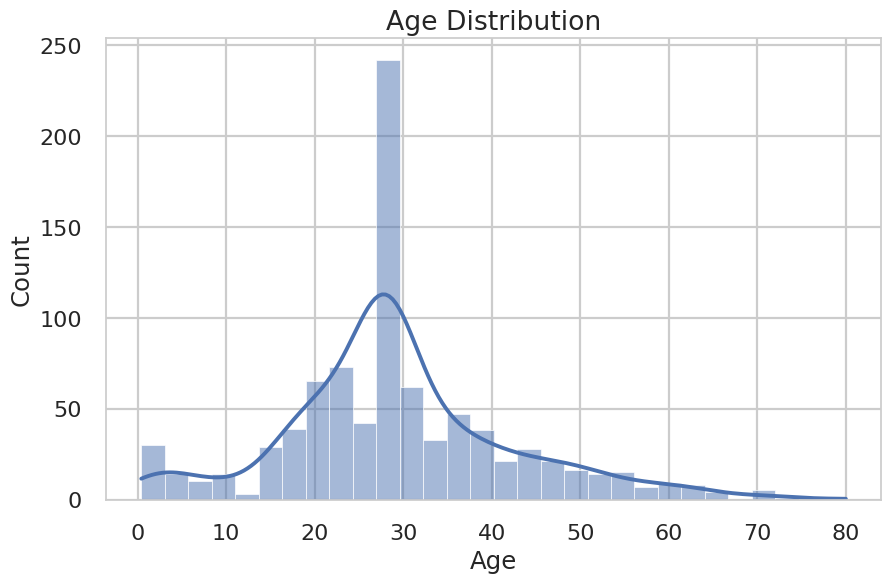

In [44]:
# Distribution of Age
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

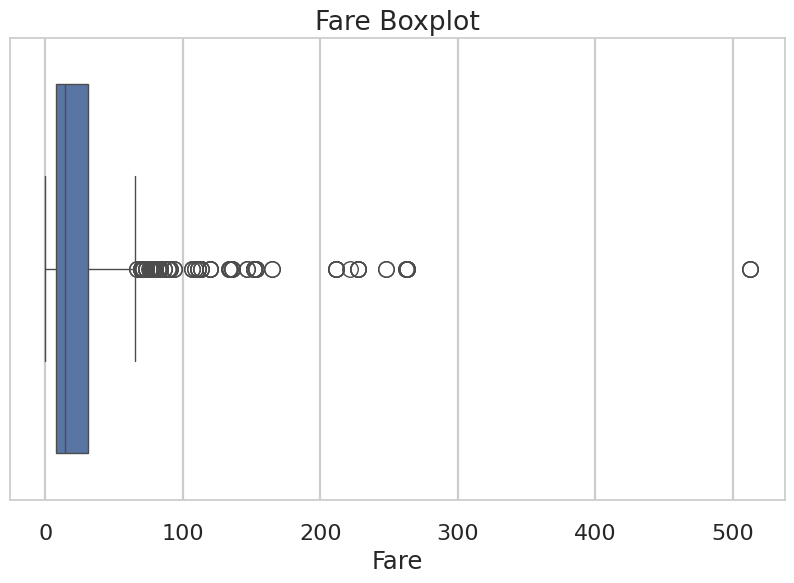

In [45]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Fare'])
plt.title('Fare Boxplot')
plt.show()

# **8. Bivariate Analysis (Relationship between Two Variables)**

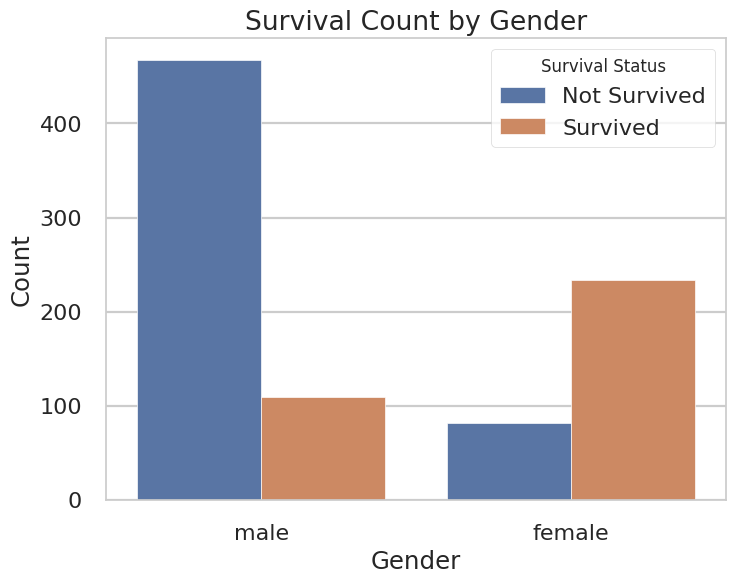

In [50]:
# 1. Map Survived values to readable easily
df['Survival_Status'] = df['Survived'].map({0: 'Not Survived', 1: 'Survived'})
# 2. Plot
plt.figure(figsize=(8,6))
sns.countplot(x='Sex', hue='Survival_Status', data=df)
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survival Status')
plt.show()


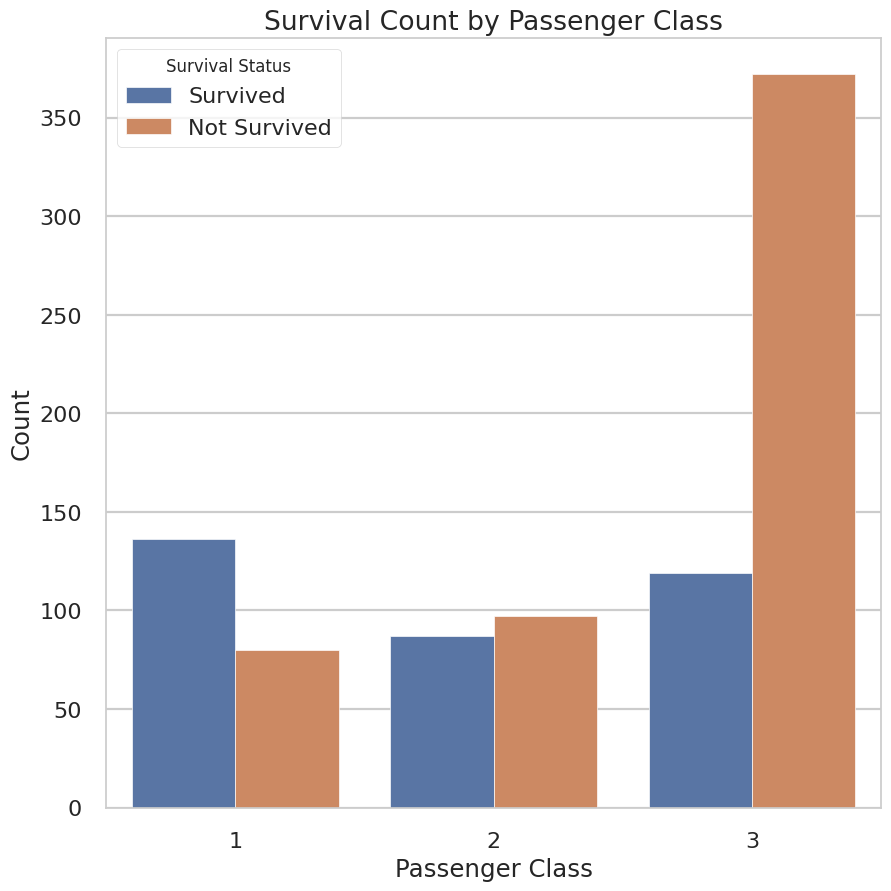

In [56]:

df['Survival_Status'] = df['Survived'].map({0: 'Not Survived', 1: 'Survived'})
plt.figure(figsize=(10,10))
sns.countplot(x='Pclass', hue='Survival_Status', data=df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survival Status')
plt.show()


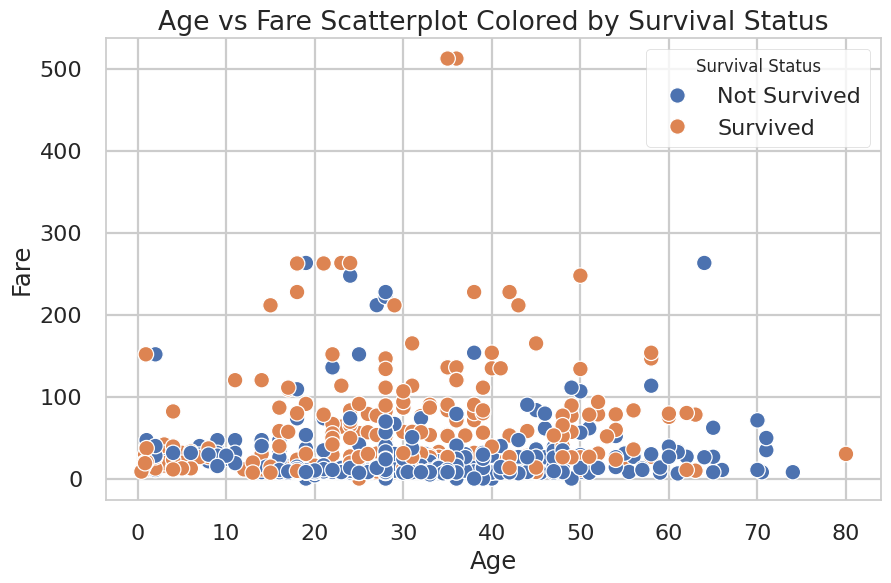

In [57]:
# Scatter plot with Survival_Status
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Fare', hue='Survival_Status', data=df)
plt.title('Age vs Fare Scatterplot Colored by Survival Status')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survival Status')
plt.show()

# **9. Multivariate Analysis (Multiple Variables Together)**

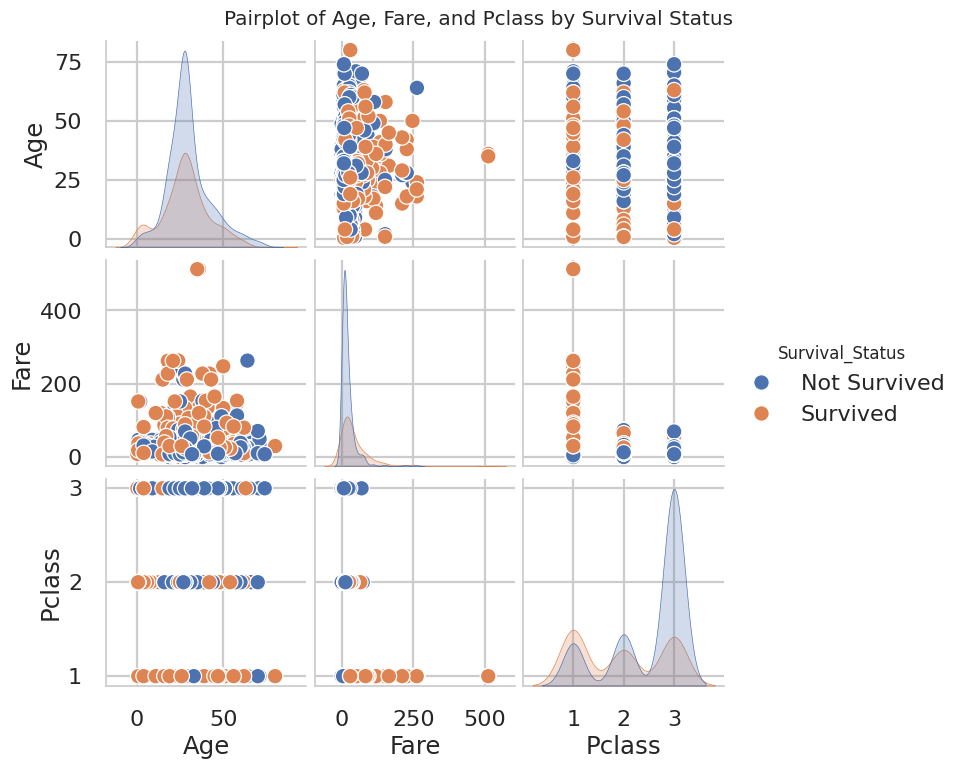

In [62]:

sns.pairplot(df[['Survival_Status', 'Age', 'Fare', 'Pclass']], hue='Survival_Status')
plt.suptitle('Pairplot of Age, Fare, and Pclass by Survival Status', y=1.02)
plt.show()

# **10. Correlation Matrix and Heatmap**

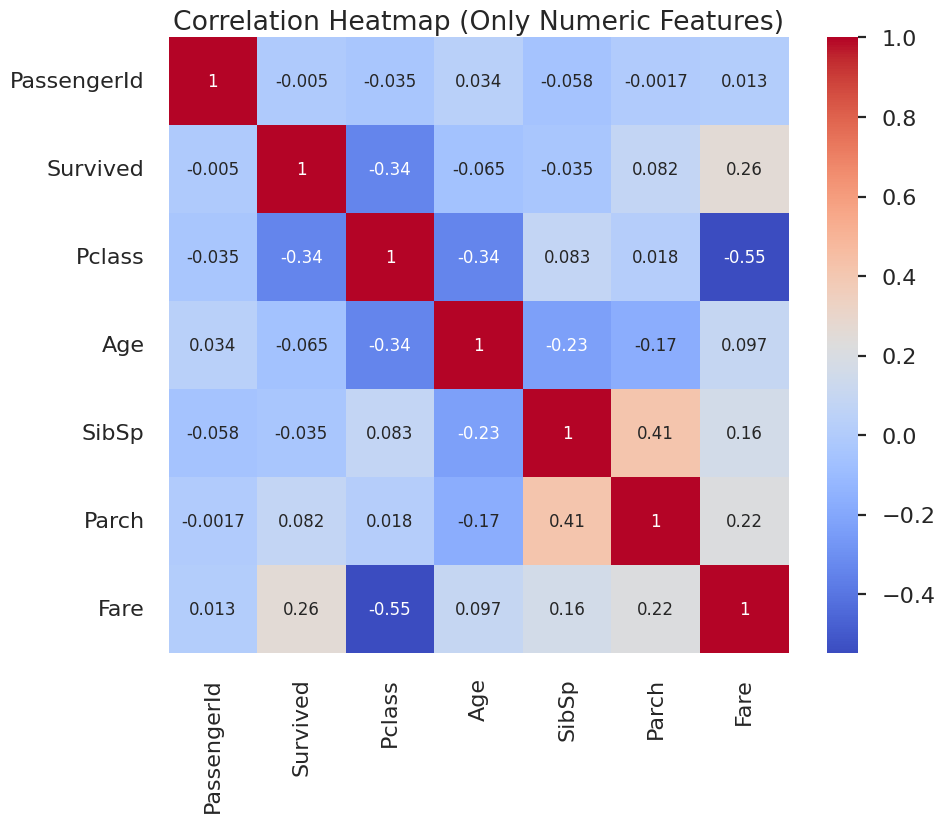

In [65]:
# Correlation Matrix
plt.figure(figsize=(10,8))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Only Numeric Features)')
plt.show()

# **11. Detect Skewness**

In [76]:
print(df['Fare'].skew(), df['Age'].skew())

4.787316519674893 0.5102446555756495


In [77]:
df['Fare_log'] = np.log1p(df['Fare'])  # log(1 + Fare)
print(df['Fare_log'].skew())

0.3949280095189306


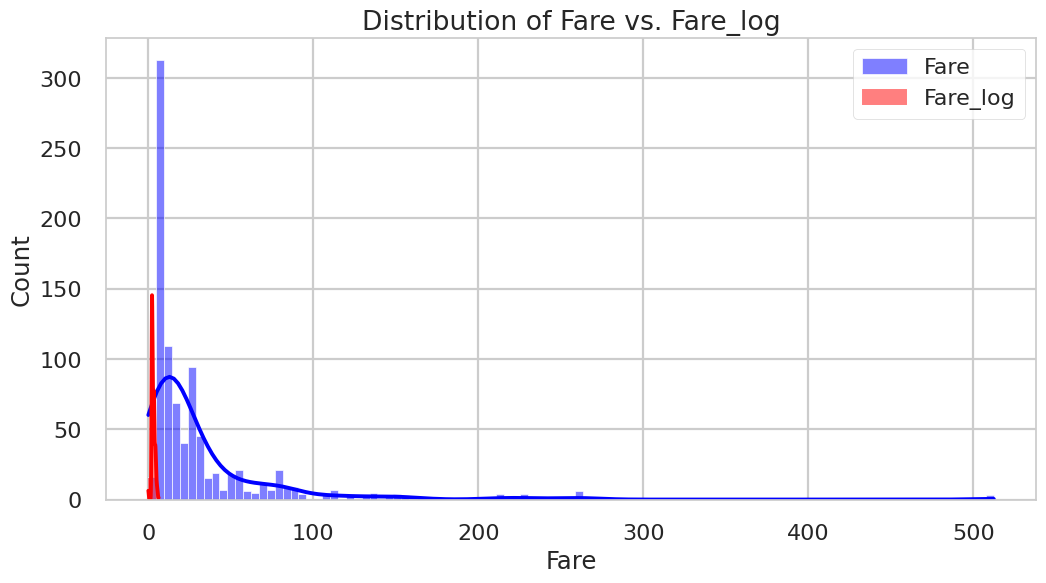

In [72]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Fare'], kde=True, color='blue', label='Fare')
sns.histplot(df['Fare_log'], kde=True, color='red', label='Fare_log')
plt.legend()
plt.title('Distribution of Fare vs. Fare_log')
plt.show()

# **12. Detect Multicollinearity**

In [71]:
# VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

features = df[['Age', 'Fare', 'Pclass']]
X = features.assign(constant=1)
vif = pd.DataFrame()
vif['variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,variables,VIF
0,Age,1.145681
1,Fare,1.451643
2,Pclass,1.625915
3,constant,29.193875




---


# **📋 Summary of Findings:**

1. Most passengers were aged between 20–40.

2. Females had a higher survival rate compared to males.

3. 1st class passengers had much better chances of survival.

4. Fare distribution is highly skewed; many passengers paid low fare, few paid very high fare.

5. Pclass is negatively correlated with survival (higher class → better chance).

6. Missing values were handled properly (Age filled with median, Embarked with mode).

7. Cabin feature was dropped due to excessive missingness.


---

